In [4]:
## https://github.com/abdulla2001111/Electric_vehicle_population/blob/main/EV.ipynb

In [82]:
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt

Import the dataset

In [83]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EB2J,Suffolk,Suffolk,VA,23435.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,NaN,476647986,POINT (-76.42443 36.8752),NaN,5.180008e+10
1,5YJ3E1ECXL,Yakima,Yakima,WA,98908.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,14.0,103490145,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,WA1LAAGE7M,Yakima,Yakima,WA,98908.0,2021,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,222,0,14.0,144941534,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
3,5YJ3E1EA1K,Danville,Danville,VA,24541.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,NaN,168513922,POINT (-79.4172 36.58598),NaN,5.159000e+10
4,1FADP5CU9E,Norfolk,Norfolk,VA,23518.0,2014,FORD,C-MAX,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,NaN,150749378,POINT (-76.21549 36.92478),NaN,5.171001e+10


#### **Data Cleaning**


Lets see the detailed informations about the columns

In [84]:
print(df.shape)
df.info()

(121978, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121978 entries, 0 to 121977
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         121978 non-null  object 
 1   County                                             121976 non-null  object 
 2   City                                               121976 non-null  object 
 3   State                                              121978 non-null  object 
 4   Postal Code                                        121976 non-null  float64
 5   Model Year                                         121978 non-null  int64  
 6   Make                                               121978 non-null  object 
 7   Model                                              121874 non-null  object 
 8   Electric Vehicle Type                              121978 non

In [85]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 2
City                                                   2
State                                                  0
Postal Code                                            2
Model Year                                             0
Make                                                   0
Model                                                104
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 297
DOL Vehicle ID                                         0
Vehicle Location                                      32
Electric Utility                                     469
2020 Census Tract                                      2
dtype: int64

Let us think about the columns with most null values accordingly and how to deal with them -   
1. Electric Utility is with the most null value in the dataset with 469 data. This is the electric power retail service territories serving the address of the registered vehicle. All ownership types for areas in Washington are included: federal, investor owned, municipal, political subdivision, and cooperative. But in the description it is also mentioned that **Blanks occur for vehicles with addresses outside of Washington or for addresses falling into areas in Washington not containing a mapped electric power retail service territory in the source data.** So we can replace this nulls with 'Others' for better result

In [86]:
df['Electric Utility'].replace(np.nan, 'Others',inplace  = True)

2. Legislative models are second in missing value with 297. It is **The specific section of Washington State that the vehicle's owner resides in, as represented in the state legislature.** We can replace the Nan's with mode of that column as we can think that those are from the most used section of Washington.

In [87]:
df['Legislative District'] = df['Legislative District'].fillna(
    df['Legislative District'].mode()[0])

3. For the Model of the car and vehicle location, there is no way to suitable method to fill the values. So for all the  rest null values we can just drop them


In [88]:
df.dropna(inplace=True)

In [89]:
# remove the duplicates if any
df.drop_duplicates(inplace= True)

In [90]:
# final cleaned dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121842 entries, 0 to 121977
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         121842 non-null  object 
 1   County                                             121842 non-null  object 
 2   City                                               121842 non-null  object 
 3   State                                              121842 non-null  object 
 4   Postal Code                                        121842 non-null  float64
 5   Model Year                                         121842 non-null  int64  
 6   Make                                               121842 non-null  object 
 7   Model                                              121842 non-null  object 
 8   Electric Vehicle Type                              121842 non-null  object

##### **1. What are the top 10 companies make the most electronic vehicles?**

In [91]:
df['Make'].value_counts().head(10)


TESLA         56110
NISSAN        12931
CHEVROLET     10771
FORD           6559
BMW            5350
KIA            4763
TOYOTA         4525
VOLKSWAGEN     3171
AUDI           2460
VOLVO          2325
Name: Make, dtype: int64

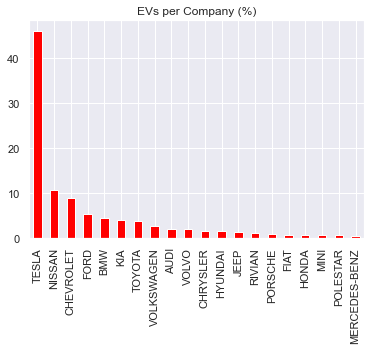

In [92]:
plot = (100 * df['Make'].value_counts()[:20] / len(df['Make'])).plot(
    kind='bar', color='red', title='EVs per Company (%)')


So, we can see Tesla is the most prominent EV producer with huge lead while NISSAN and CHEVROLET are  second and third with a small margin.

#### **2. What are the top 10 models in Electric Vehicle?**

In [93]:
df['Model'].value_counts().head(10)

MODEL 3        24114
MODEL Y        19900
LEAF           12924
MODEL S         7386
BOLT EV         5072
VOLT            4893
MODEL X         4660
PRIUS PRIME     2422
NIRO            2326
ID.4            2139
Name: Model, dtype: int64

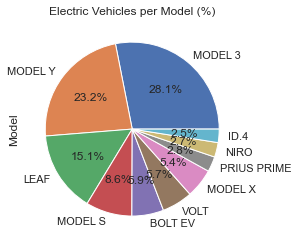

In [94]:
plot = (100 * df['Model'].value_counts()[:10] / len(df['Model'])).plot(
    kind='pie', autopct='%1.1f%%', title='Electric Vehicles per Model (%)')


MODEL 3 is the most famous EV model which is from tesla.

#### **3.How many vehicles are there per type?**

In [95]:
df['Electric Vehicle Type'].value_counts()


Battery Electric Vehicle (BEV)            93990
Plug-in Hybrid Electric Vehicle (PHEV)    27852
Name: Electric Vehicle Type, dtype: int64

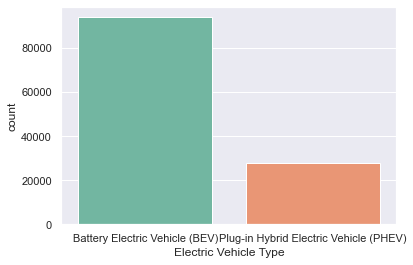

In [96]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Electric Vehicle Type", data=df, palette="Set2")

So we can BEV type of Electric Vehicles are more that thrice the Plug-in Hybrid type.

#### **4.How many vehicles are eligible for Clean Alternative Fuel Vehicle?**

Clean Alternative Fuel Vehicle Eligible                         59164
Eligibility unknown as battery range has not been researched    47302
Not eligible due to low battery range                           15376
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64


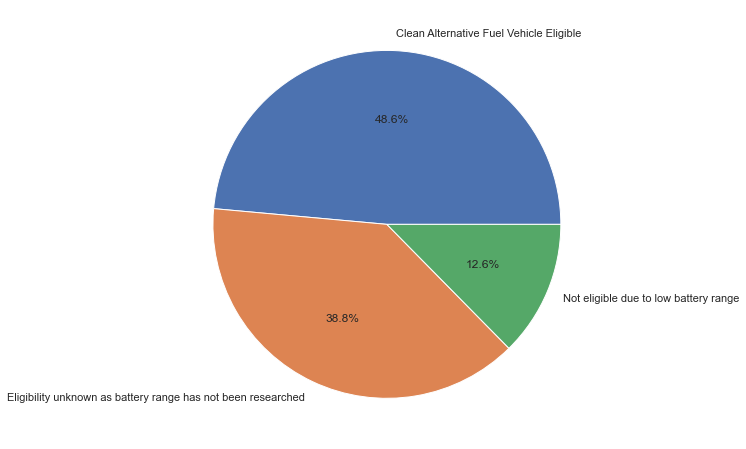

In [97]:
eligibility_counts = df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'].value_counts(
)
plt.figure(figsize=(8, 8))
print(eligibility_counts)
plt.pie(eligibility_counts.values,
        labels=eligibility_counts.index, autopct='%1.1f%%')
plt.show()


A large number of clean alternative fuel vehicles are observed, however, there is a high percentage of unknown eligibility due to low researched as well as ineligible.

#### **5.Which cities have the most electric vehicles?**

<AxesSubplot:>

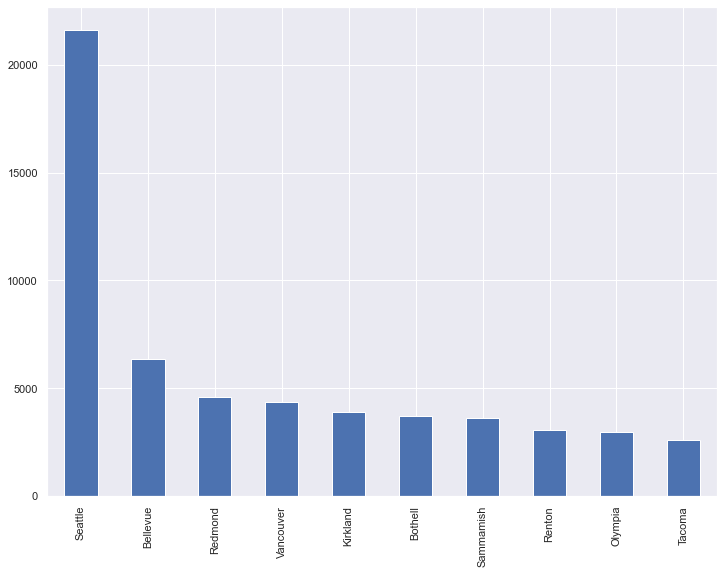

In [98]:
df['City'].value_counts().head(10).plot(kind='bar',figsize=(12,9))

Seattle has a high percentage of electric vehicles; this may be because there are more charging stations available, among other things.

#### **6.Statistical analysis of base price of Electronic vehicle**

In [99]:
df['Base MSRP'].describe()


count    121842.000000
mean       1628.063804
std       10269.280526
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      845000.000000
Name: Base MSRP, dtype: float64

From here we see that, even the third quartile(75%) or more data are 0. As this is the **This is the lowest Manufacturer's Suggested Retail Price (MSRP) for any trim level of the model in question.**. That means many manufacturar did not define or suggest MSRP for those vehicle. This creates a problem to judge the real price of the vehicles.

#### **7.Statistical analysis of Electric Range of Electronic vehicle**

In [100]:
df['Electric Range'].describe()


count    121842.000000
mean         81.374321
std         100.908895
min           0.000000
25%           0.000000
50%          25.000000
75%         200.000000
max         337.000000
Name: Electric Range, dtype: float64

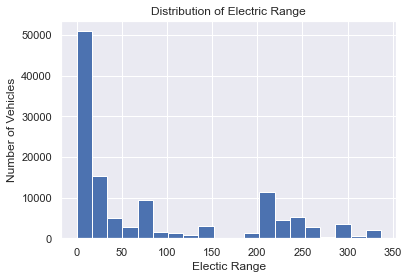

In [101]:
plt.hist(df['Electric Range'], bins=20)
plt.title('Distribution of Electric Range')
plt.xlabel('Electic Range')
plt.ylabel('Number of Vehicles')
plt.show()


This is an interesting graph showing the Elctric Range i.e.**(Describes how far a vehicle can travel purely on its electric charge.)**.Here a lot of data(25%) are showing 0, which is not feasible because a EV should travel a bare minimum distance before its charge it used up. So this indicates a lack of proper data collection or it was indicated 0 for null values. We can try to find more accurate values by discarding the 0 values.

In [102]:
df[df['Electric Range']!= 0]['Electric Range'].describe()


count    74540.000000
mean       133.013281
std         98.871963
min          6.000000
25%         33.000000
50%         93.000000
75%        220.000000
max        337.000000
Name: Electric Range, dtype: float64

Now we get a more accurate result with mean Electric range of 133.

#### **8.How is Electric vehicle production over the years?**

<AxesSubplot:xlabel='Model Year', ylabel='Count'>

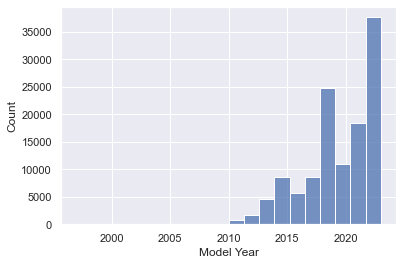

In [103]:
sns.histplot(data=df, x="Model Year", bins=20)


We can clearly see a gradual increase in EV production and a massive increase in the latest year.

#### **9. Relation between Electric Range and Clean Alternative Fuel Vehicle (CAFV) Eligibility**


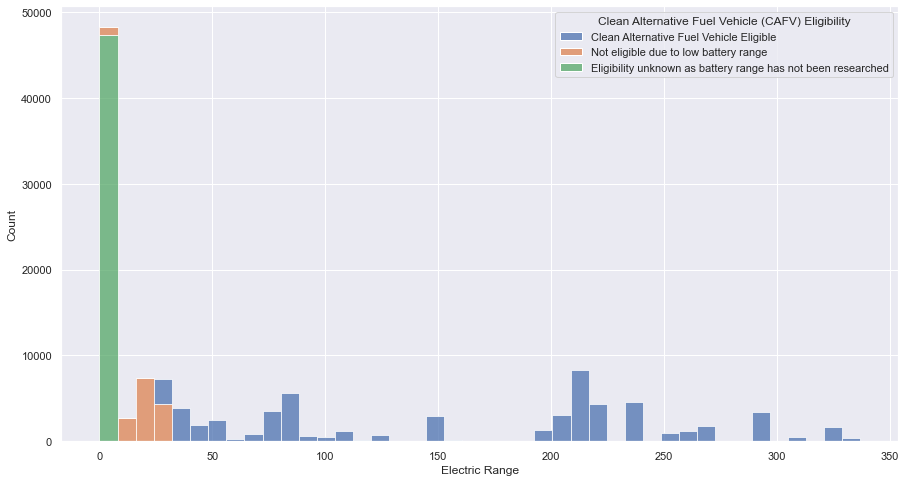

In [104]:
sns.histplot(data=df, x="Electric Range",
             hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility", multiple="stack")
plt.gcf().set_size_inches(15, 8)


From the chart, we can see that for electric ranges greater than 50 are eligible vehicles with clean fuel. The uncertainty lies in those ranges below 50 as they are either not eligible or there is no clear information on them.

#### **10. Relation between Electric Range and Electric Vehicle Type**


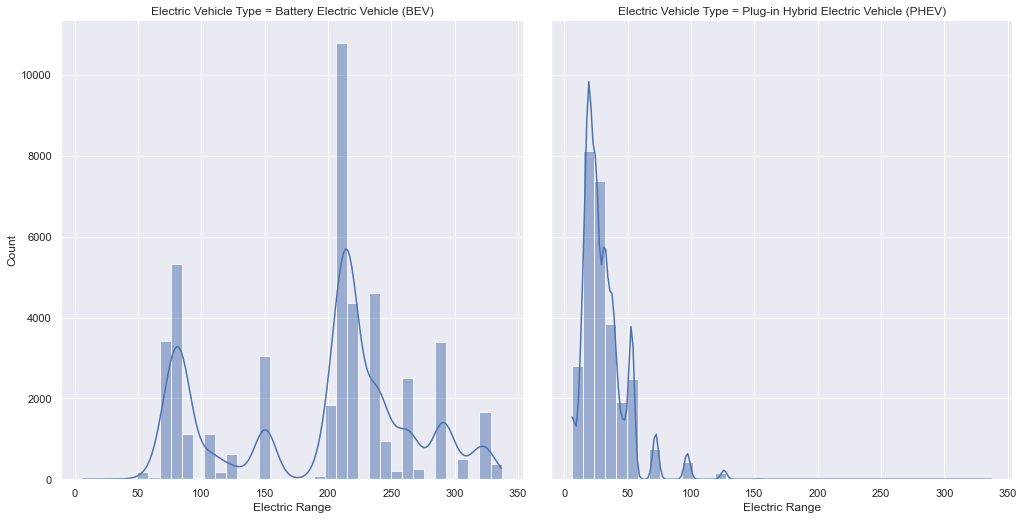

In [105]:
sns.displot(data=df[df['Electric Range'] != 0], x="Electric Range",
            col="Electric Vehicle Type", kde=True)
plt.gcf().set_size_inches(15, 8)


This is a very descriptive graph which crealy shows that all of the Battery Electric Vehicle(BEV) has more that 50 Electric Range.  Whereas most of the Plug-in Hybrid Electric Vehicle (PHEV) has less than 50 Electric Range. This clearly shows the superiority of BHE in long distant travel with a single battery charge

#### **11. Is the Electric Vehicle produced are Clean Alternative Fuel Vehicle Eligible over the years increasing? Shown for both the type separately**

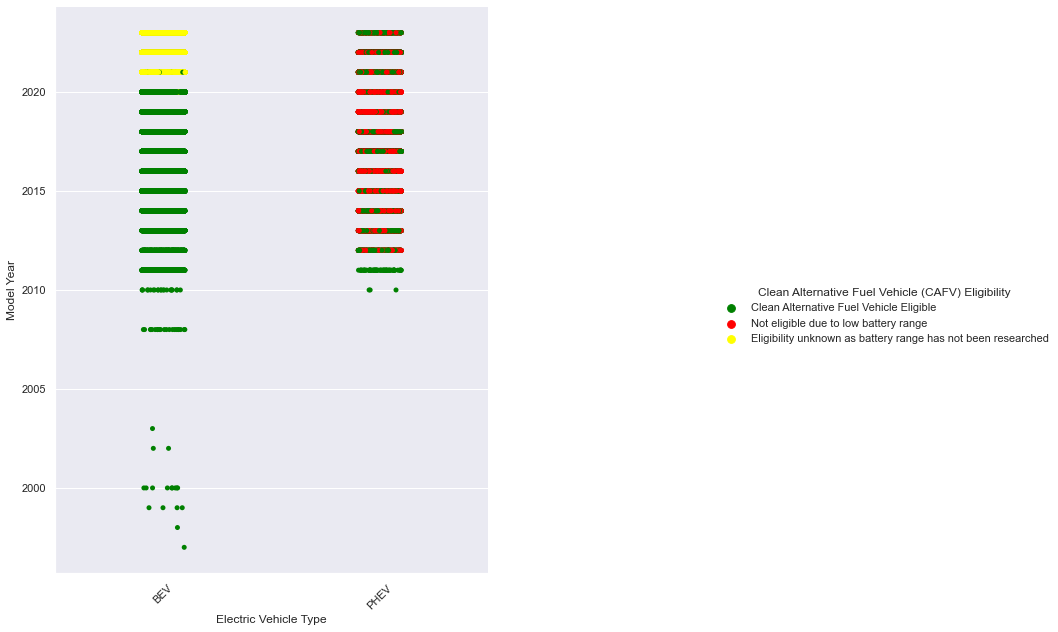

In [106]:
battery_year = sns.catplot(
    x="Electric Vehicle Type",
    y="Model Year",
    palette={'Not eligible due to low battery range': 'red', 'Clean Alternative Fuel Vehicle Eligible': 'green',
             'Eligibility unknown as battery range has not been researched': 'yellow'},
    hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility",
    data=df)
battery_year.set_xticklabels(labels=['BEV', 'PHEV'], rotation=45)
plt.gcf().set_size_inches(16,9)
plt.show()

This graph shows an intuative description of Clean Alternative Fuel Vehicle Eligibility over the years.  
For BEV, we can see that from the start it was always Clean Alternative Fuel Vehicle Eligible. But after 2020, it becomes Eligibility Unknown which may be due to lack of reseach of recent models.  
As for PHEV, The result is quite mixed, but mostly due to its low battery range it does not get CAFV eligibility in most of the years.